<a href="https://colab.research.google.com/github/rileygoetz/DS1002-S24/blob/main/Assignments/Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [54]:
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv')


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [55]:
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 741
Number of columns: 1


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [91]:
df = pd.read_csv('data.csv', sep = ';')
print(df)

                     timeOpen                 timeClose  \
0    2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1    2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2    2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3    2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4    2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   
..                        ...                       ...   
736  2021-01-06T00:00:00.000Z  2021-01-06T23:59:59.999Z   
737  2021-01-05T00:00:00.000Z  2021-01-05T23:59:59.999Z   
738  2021-01-04T00:00:00.000Z  2021-01-04T23:59:59.999Z   
739  2021-01-03T00:00:00.000Z  2021-01-03T23:59:59.999Z   
740  2021-01-03T00:00:00.000Z  2021-01-03T23:59:59.999Z   

                     timeHigh                   timeLow      open      high  \
0    2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968  0.853502   
1    2022-12-30T04:22:00.000Z  2022-12-30T15:12:00.000Z  0.860193  0.864752   
2    2022-12-29T00:49:00.000Z  2022-12-29T21:03:00.000

In [92]:
num_rows, num_columns = df.shape
print('There are', num_rows, 'rows.')
print('There are', num_columns, 'columns.')

There are 741 rows.
There are 11 columns.


In [93]:
print('There were', df.duplicated().sum(), 'duplicated rows.')
df = df.drop_duplicates()
print('There are now', df.duplicated().sum(), 'duplicated rows.')

There were 14 duplicated rows.
There are now 0 duplicated rows.


In [94]:
df = df.dropna()
empty_vals = df.isna().sum()
total_empty_vals = empty_vals.sum()
print('There are', total_empty_vals, 'missing values.')

There are 0 missing values.


In [97]:
df=df.drop(['open', 'high', 'low', 'volume', 'timestamp'], axis = 1)
df

,timeOpen,timeClose,timeHigh,timeLow,close,marketCap
0,2021-01-03 00:00:00+00:00,2021-01-03 23:59:59.999000+00:00,2021-01-03 16:25:03+00:00,2021-01-03 00:25:03+00:00,6.923968,6.532553e+08
1,2021-01-04 00:00:00+00:00,2021-01-04 23:59:59.999000+00:00,2021-01-04 06:40:03+00:00,2021-01-04 10:18:03+00:00,7.514079,7.089305e+08
2,2021-01-05 00:00:00+00:00,2021-01-05 23:59:59.999000+00:00,2021-01-05 22:44:03+00:00,2021-01-05 06:19:03+00:00,8.664688,8.174869e+08
3,2021-01-06 00:00:00+00:00,2021-01-06 23:59:59.999000+00:00,2021-01-06 23:59:03+00:00,2021-01-06 01:41:03+00:00,9.390797,8.859932e+08
4,2021-01-07 00:00:00+00:00,2021-01-07 23:59:59.999000+00:00,2021-01-07 17:59:03+00:00,2021-01-07 08:25:03+00:00,9.562131,9.021580e+08
...,...,...,...,...,...,...
722,2022-12-27 00:00:00+00:00,2022-12-27 23:59:59.999000+00:00,2022-12-27 14:19:00+00:00,2022-12-27 19:12:00+00:00,0.923668,3.037898e+08
723,2022-12-28 00:00:00+00:00,2022-12-28 23:59:59.999000+00:00,2022-12-28 00:20:00+00:00,2022-12-28 10:44:00+00:00,0.886091,2.914310e+08
724,2022-12-29 00:00:00+00:00,2022-12-29 23:59:59.999000+00:00,2022-12-29 00:49:00+00:00,2022-12-29 21:03:00+00:00,0.860231,2.829258e+08
725,2022-12-30 00:00:00+00:00,2022-12-30 23:59:59.999000+00:00,2022-12-30 04:22:00+00:00,2022-12-30 15:12:00+00:00,0.839048,2.759588e+08


In [98]:
from datetime import datetime
df['timeOpen'] = pd.to_datetime(df['timeOpen'], infer_datetime_format=True, errors = 'coerce')
df['timeClose'] = pd.to_datetime(df['timeClose'], infer_datetime_format=True, errors = 'coerce')
df['timeHigh'] = pd.to_datetime(df['timeHigh'], infer_datetime_format=True, errors = 'coerce')
df['timeLow'] = pd.to_datetime(df['timeLow'], infer_datetime_format=True, errors = 'coerce')
#Put them in chronological order
df['timeOpen']=pd.to_datetime (df['timeOpen'])
df = df.sort_values (by='timeOpen')
df['timeClose'] = pd.to_datetime(df['timeClose'])
df = df.sort_values(by='timeClose')
df['timeHigh'] = pd.to_datetime(df['timeHigh'])
df = df.sort_values(by='timeHigh')
df['timeLow'] = pd.to_datetime (df[ 'timeLow'])
df = df.sort_values(by='timeLow')
df = df.reset_index(drop=True)
df

,timeOpen,timeClose,timeHigh,timeLow,close,marketCap
0,2021-01-03 00:00:00+00:00,2021-01-03 23:59:59.999000+00:00,2021-01-03 16:25:03+00:00,2021-01-03 00:25:03+00:00,6.923968,6.532553e+08
1,2021-01-04 00:00:00+00:00,2021-01-04 23:59:59.999000+00:00,2021-01-04 06:40:03+00:00,2021-01-04 10:18:03+00:00,7.514079,7.089305e+08
2,2021-01-05 00:00:00+00:00,2021-01-05 23:59:59.999000+00:00,2021-01-05 22:44:03+00:00,2021-01-05 06:19:03+00:00,8.664688,8.174869e+08
3,2021-01-06 00:00:00+00:00,2021-01-06 23:59:59.999000+00:00,2021-01-06 23:59:03+00:00,2021-01-06 01:41:03+00:00,9.390797,8.859932e+08
4,2021-01-07 00:00:00+00:00,2021-01-07 23:59:59.999000+00:00,2021-01-07 17:59:03+00:00,2021-01-07 08:25:03+00:00,9.562131,9.021580e+08
...,...,...,...,...,...,...
722,2022-12-27 00:00:00+00:00,2022-12-27 23:59:59.999000+00:00,2022-12-27 14:19:00+00:00,2022-12-27 19:12:00+00:00,0.923668,3.037898e+08
723,2022-12-28 00:00:00+00:00,2022-12-28 23:59:59.999000+00:00,2022-12-28 00:20:00+00:00,2022-12-28 10:44:00+00:00,0.886091,2.914310e+08
724,2022-12-29 00:00:00+00:00,2022-12-29 23:59:59.999000+00:00,2022-12-29 00:49:00+00:00,2022-12-29 21:03:00+00:00,0.860231,2.829258e+08
725,2022-12-30 00:00:00+00:00,2022-12-30 23:59:59.999000+00:00,2022-12-30 04:22:00+00:00,2022-12-30 15:12:00+00:00,0.839048,2.759588e+08


Now display the first 10 rows of the cleaned dataset.

In [99]:
df.head(10)

,timeOpen,timeClose,timeHigh,timeLow,close,marketCap
0,2021-01-03 00:00:00+00:00,2021-01-03 23:59:59.999000+00:00,2021-01-03 16:25:03+00:00,2021-01-03 00:25:03+00:00,6.923968,6.532553e+08
1,2021-01-04 00:00:00+00:00,2021-01-04 23:59:59.999000+00:00,2021-01-04 06:40:03+00:00,2021-01-04 10:18:03+00:00,7.514079,7.089305e+08
2,2021-01-05 00:00:00+00:00,2021-01-05 23:59:59.999000+00:00,2021-01-05 22:44:03+00:00,2021-01-05 06:19:03+00:00,8.664688,8.174869e+08
3,2021-01-06 00:00:00+00:00,2021-01-06 23:59:59.999000+00:00,2021-01-06 23:59:03+00:00,2021-01-06 01:41:03+00:00,9.390797,8.859932e+08
4,2021-01-07 00:00:00+00:00,2021-01-07 23:59:59.999000+00:00,2021-01-07 17:59:03+00:00,2021-01-07 08:25:03+00:00,9.562131,9.021580e+08
5,2021-01-08 00:00:00+00:00,2021-01-08 23:59:59.999000+00:00,2021-01-08 15:07:03+00:00,2021-01-08 02:46:03+00:00,9.380988,8.850677e+08
6,2021-01-09 00:00:00+00:00,2021-01-09 23:59:59.999000+00:00,2021-01-09 22:15:03+00:00,2021-01-09 07:05:03+00:00,9.570511,9.029486e+08
7,2021-01-10 00:00:00+00:00,2021-01-10 23:59:59.999000+00:00,2021-01-10 09:53:03+00:00,2021-01-10 20:31:03+00:00,9.308809,8.782578e+08
8,2021-01-11 00:00:00+00:00,2021-01-11 23:59:59.999000+00:00,2021-01-11 00:00:03+00:00,2021-01-11 16:47:03+00:00,8.610997,8.124213e+08
9,2021-01-12 00:00:00+00:00,2021-01-12 23:59:59.999000+00:00,2021-01-12 07:51:03+00:00,2021-01-12 14:38:03+00:00,8.381133,7.907344e+08


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [101]:
 df=pd.DataFrame({
     'date':['2023-10-22', '2023-10-21', '2023-10-20', '2023-10-19'],
     'ticker': ['AAPL', 'AAPL', 'AAPL', 'AAPL'],
     'close': [181.13, 184.05, 186.14, 182.23 ]
 })

df['close_diff'] = df['close'].diff()
df.fillna(0, inplace=True)
df

,date,ticker,close,close_diff
0,2023-10-22,AAPL,181.13,0.00
1,2023-10-21,AAPL,184.05,2.92
2,2023-10-20,AAPL,186.14,2.09
3,2023-10-19,AAPL,182.23,-3.91


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [102]:
df['close_change'] = df['close'].diff()

top_positive_growth = df[df['close_change']>0].sort_values(by='close_change', ascending=False).head(10)

print(top_positive_growth[['date', 'close_change']])

         date  close_change
1  2023-10-21          2.92
2  2023-10-20          2.09


## 6. Calculate the Percentage Rate of Change



```

```

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [104]:
df['rate_of_change'] = (df['close_change'] / df['close'].shift(1)) * 100
print(df)

         date ticker   close  close_diff  close_change  rate_of_change
0  2023-10-22   AAPL  181.13        0.00           NaN             NaN
1  2023-10-21   AAPL  184.05        2.92          2.92        1.612102
2  2023-10-20   AAPL  186.14        2.09          2.09        1.135561
3  2023-10-19   AAPL  182.23       -3.91         -3.91       -2.100569


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [105]:
top_5_positive = df.sort_values(by='rate_of_change', ascending=False).head(5)[['date', 'rate_of_change']]

top_5_negative = df.sort_values(by='rate_of_change', ascending=True).head(5)[['date', 'rate_of_change']]

top_changes = pd.concat([top_5_positive.assign(Type='Positive'), top_5_negative.assign(Type='Negative')])

print(top_changes)

         date  rate_of_change      Type
1  2023-10-21        1.612102  Positive
2  2023-10-20        1.135561  Positive
3  2023-10-19       -2.100569  Positive
0  2023-10-22             NaN  Positive
3  2023-10-19       -2.100569  Negative
2  2023-10-20        1.135561  Negative
1  2023-10-21        1.612102  Negative
0  2023-10-22             NaN  Negative


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

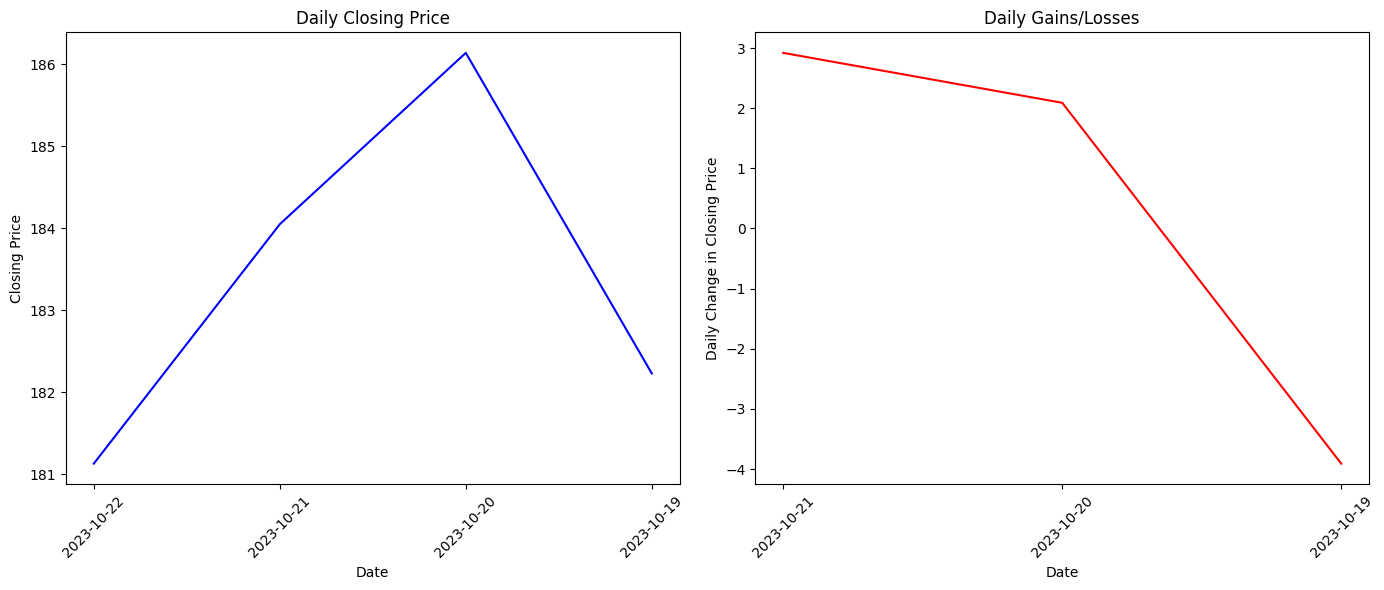

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# First Plot: Daily Closing Price
plt.subplot(1, 2, 1)
plt.plot(df['date'], df['close'], color='blue')
plt.title('Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)

# Second Plot: Daily Gains/Losses
plt.subplot(1, 2, 2)
plt.plot(df['date'], df['close_change'], color='red')
plt.title('Daily Gains/Losses')
plt.xlabel('Date')
plt.ylabel('Daily Change in Closing Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

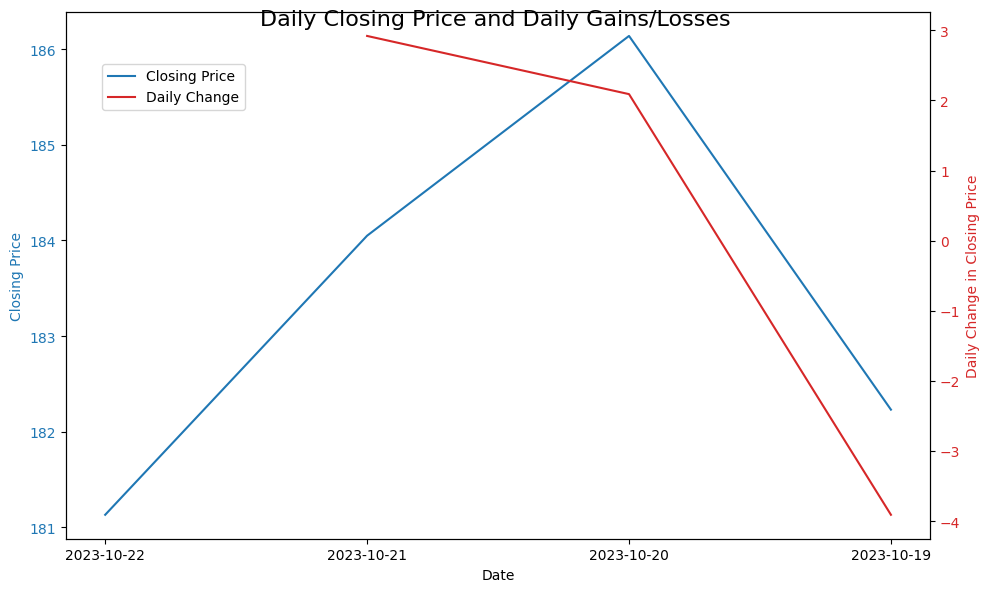

In [107]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(df['date'], df['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Daily Change in Closing Price', color=color)
ax2.plot(df['date'], df['close_change'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.suptitle('Daily Closing Price and Daily Gains/Losses', fontsize=16, verticalalignment='top')
fig.legend(['Closing Price', 'Daily Change'], loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()
